## 인공신경망을 활용한 RGB컬러 이미지 인식

In [18]:
import numpy as np
from tensorflow import keras
from matplotlib import pyplot as plt

In [46]:
label_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
cifar = keras.datasets.cifar10
(train_X, train_Y), (test_X, test_Y) = cifar.load_data()

In [14]:
# 그레이스케일 변환
def preprocess(images) :
    # 이미지 정규화
    images = images / 255.0

    # 그레이스케일 변환
    r = images[ :, :, :, 0]
    g = images [ : , :, :, 1]
    b = images[ :, :, :, 2]

    return (r + g + b) /3.0

train_X = preprocess(train_X)
test_X = preprocess(test_X)

print(train_X.shape, test_X.shape, train_Y.shape, test_Y.shape)

(50000, 32, 32) (10000, 32, 32) (50000, 1) (10000, 1)


In [21]:
train_X = np.asarray(train_X) / 255.0
test_X = np.asarray(test_X) / 255.0

print(train_X.shape, test_X.shape, train_Y.shape, test_Y.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3) (50000, 1) (10000, 1)


In [23]:
# 모델 구성
model = keras.Sequential([
    keras.layers.Input(shape=(32,32,3)), # Input 레이어 추가 권장
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)
history = model.fit(train_X, train_Y, epochs = 100, validation_data = (test_X, test_Y), callbacks = [early_stop])

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3132 - loss: 1.9138 - val_accuracy: 0.3683 - val_loss: 1.7744
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3800 - loss: 1.7447 - val_accuracy: 0.3896 - val_loss: 1.7247
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4008 - loss: 1.6876 - val_accuracy: 0.4169 - val_loss: 1.6486
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4086 - loss: 1.6565 - val_accuracy: 0.4235 - val_loss: 1.6267
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4155 - loss: 1.6330 - val_accuracy: 0.4163 - val_loss: 1.6214
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4214 - loss: 1.6234 - val_accuracy: 0.4190 - val_loss: 1.6310
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4284 - loss: 1.6072 - val_accuracy: 0.4232 - val_loss: 1.6229
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4321 - loss: 1

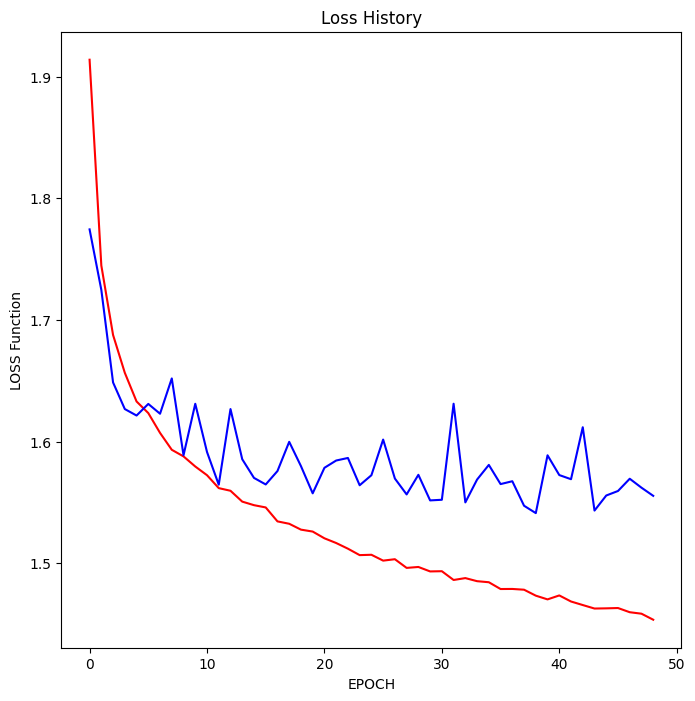

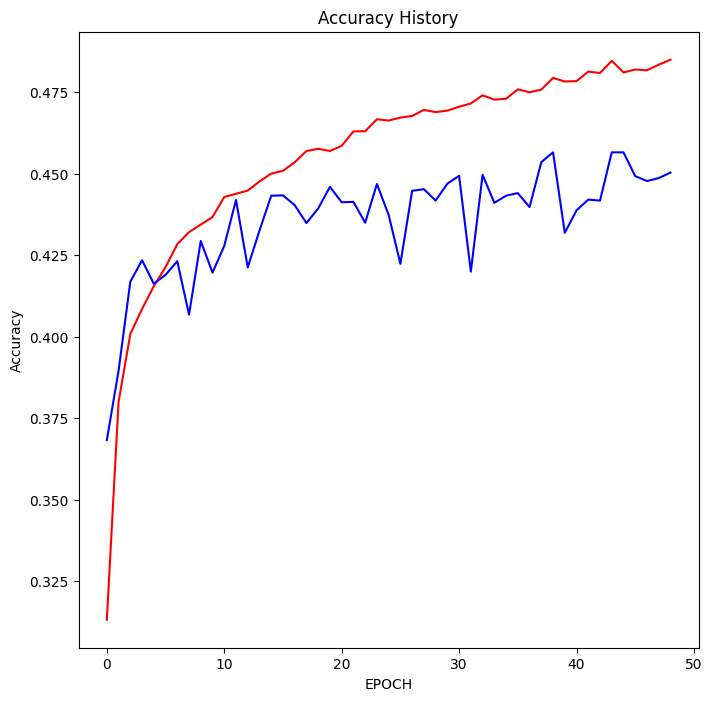

In [24]:
# 정확도 그래프
train_history = history.history["loss"]
validation_history = history.history["val_loss"]
fig = plt.figure(figsize=(8, 8))
plt.title("Loss History")
plt.xlabel("EPOCH")
plt.ylabel("LOSS Function")
plt.plot(train_history, "red")
plt.plot(validation_history, 'blue')
fig.savefig("train_history.png")

train_history = history.history["accuracy"]
validation_history = history.history["val_accuracy"]
fig = plt.figure(figsize=(8, 8))
plt.title("Accuracy History")
plt.xlabel("EPOCH")
plt.ylabel("Accuracy")
plt.plot(train_history, "red")
plt.plot(validation_history, 'blue')
fig.savefig("accuracy_history.png")

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_15924\694442133.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  true_label = label_names[int(np.asarray(train_Y[i]))]


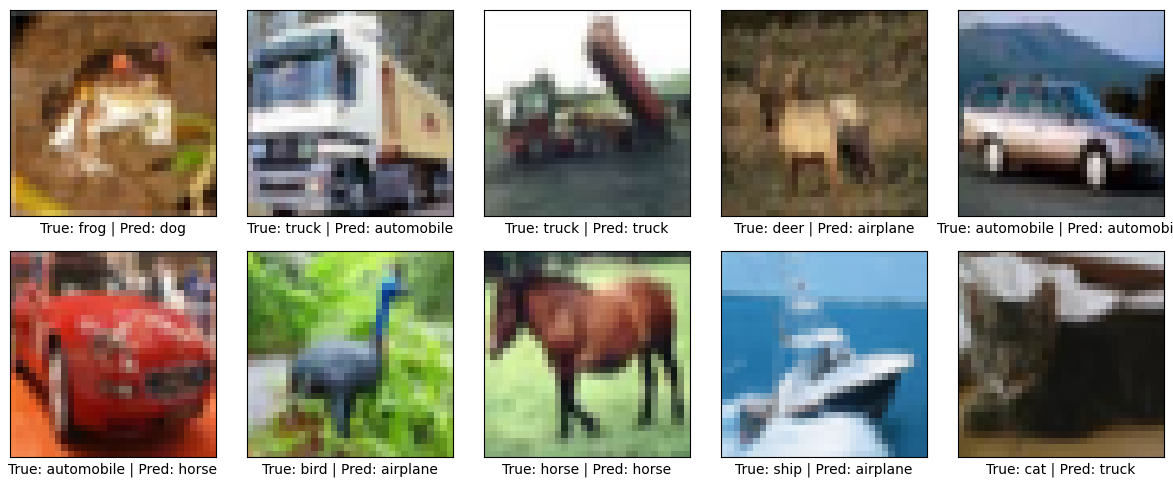

In [50]:
plt.figure(figsize=(12, 12))
for i in range(len(label_names)):
    plt.subplot(5, 5, i + 1)
    plt.xticks([]); plt.yticks([]); plt.grid(False)
    plt.imshow(train_X[i])
    true_label = label_names[int(np.asarray(train_Y[i]))]

    # 예측 라벨
    predicted_label = "N/A"
    if model is not None:
        prediction = model.predict(np.expand_dims(train_X[i], axis=0), verbose=0)
        pred_idx = int(np.argmax(prediction))
        predicted_label = label_names[pred_idx]

    plt.xlabel(f'True: {true_label} | Pred: {predicted_label}')

plt.tight_layout()
plt.show()
